 Explore and analyze a Brazilian e-commerce dataset to uncover insights and trends. You will perform data loading, cleaning, and various SQL queries to extract meaningful information about the e-commerce platform's operations and performance.

## About the Columns

The Brazilian E-Commerce dataset contains information about 100,000 orders made on the Olist online store from 2016 to 2018. The dataset is structured as a relational database with multiple interconnected tables. Here's a breakdown of the key columns:

### Order Information
- **order_id**: Unique identifier for each order
- **order_status**: Current status of the order (e.g., delivered, shipped, canceled)
- **order_purchase_timestamp**: Date and time when the order was placed
- **order_approved_at**: Date and time when the order was approved
- **order_delivered_carrier_date**: Date when the order was handed to the logistics partner
- **order_delivered_customer_date**: Date when the customer received the order
- **order_estimated_delivery_date**: Estimated delivery date provided to the customer

### Customer Information
- **customer_id**: Unique identifier for each customer
- **customer_unique_id**: Unique identifier to find customers who made multiple purchases
- **customer_zip_code_prefix**: First five digits of the customer's zip code

### Product Information
- **product_id**: Unique identifier for each product
- **product_category_name**: Category name in Portuguese
- **product_category_name_english**: Category name translated to English
- **product_name_lenght**: Number of characters in the product name
- **product_description_lenght**: Number of characters in the product description
- **product_photos_qty**: Number of product photos

### Order Items
- **order_item_id**: Sequential number identifying the items within an order
- **product_id**: Product identifier (links to the products table)
- **seller_id**: Seller identifier (links to the sellers table)
- **shipping_limit_date**: Date when the seller must ship the order
- **price**: Price of the item
- **freight_value**: Item freight value

### Payment Information
- **payment_sequential**: Payment sequence for each order
- **payment_type**: Payment method (e.g., credit card, voucher, boleto)
- **payment_installments**: Number of installments
- **payment_value**: Transaction value

### Review Information
- **review_id**: Unique review identifier
- **review_score**: Score given by the customer (1 to 5)
- **review_comment_title**: Title of the review comment
- **review_comment_message**: Content of the review comment
- **review_creation_date**: Date when the review was posted
- **review_answer_timestamp**: Date when the seller answered the review

### Geolocation
- **geolocation_zip_code_prefix**: First 5 digits of zip code
- **geolocation_lat**: Latitude
- **geolocation_lng**: Longitude
- **geolocation_city**: City name
- **geolocation_state**: State abbreviation

Note: All column names and descriptions are in English, except for product categories which are in Portuguese with an English translation provided.


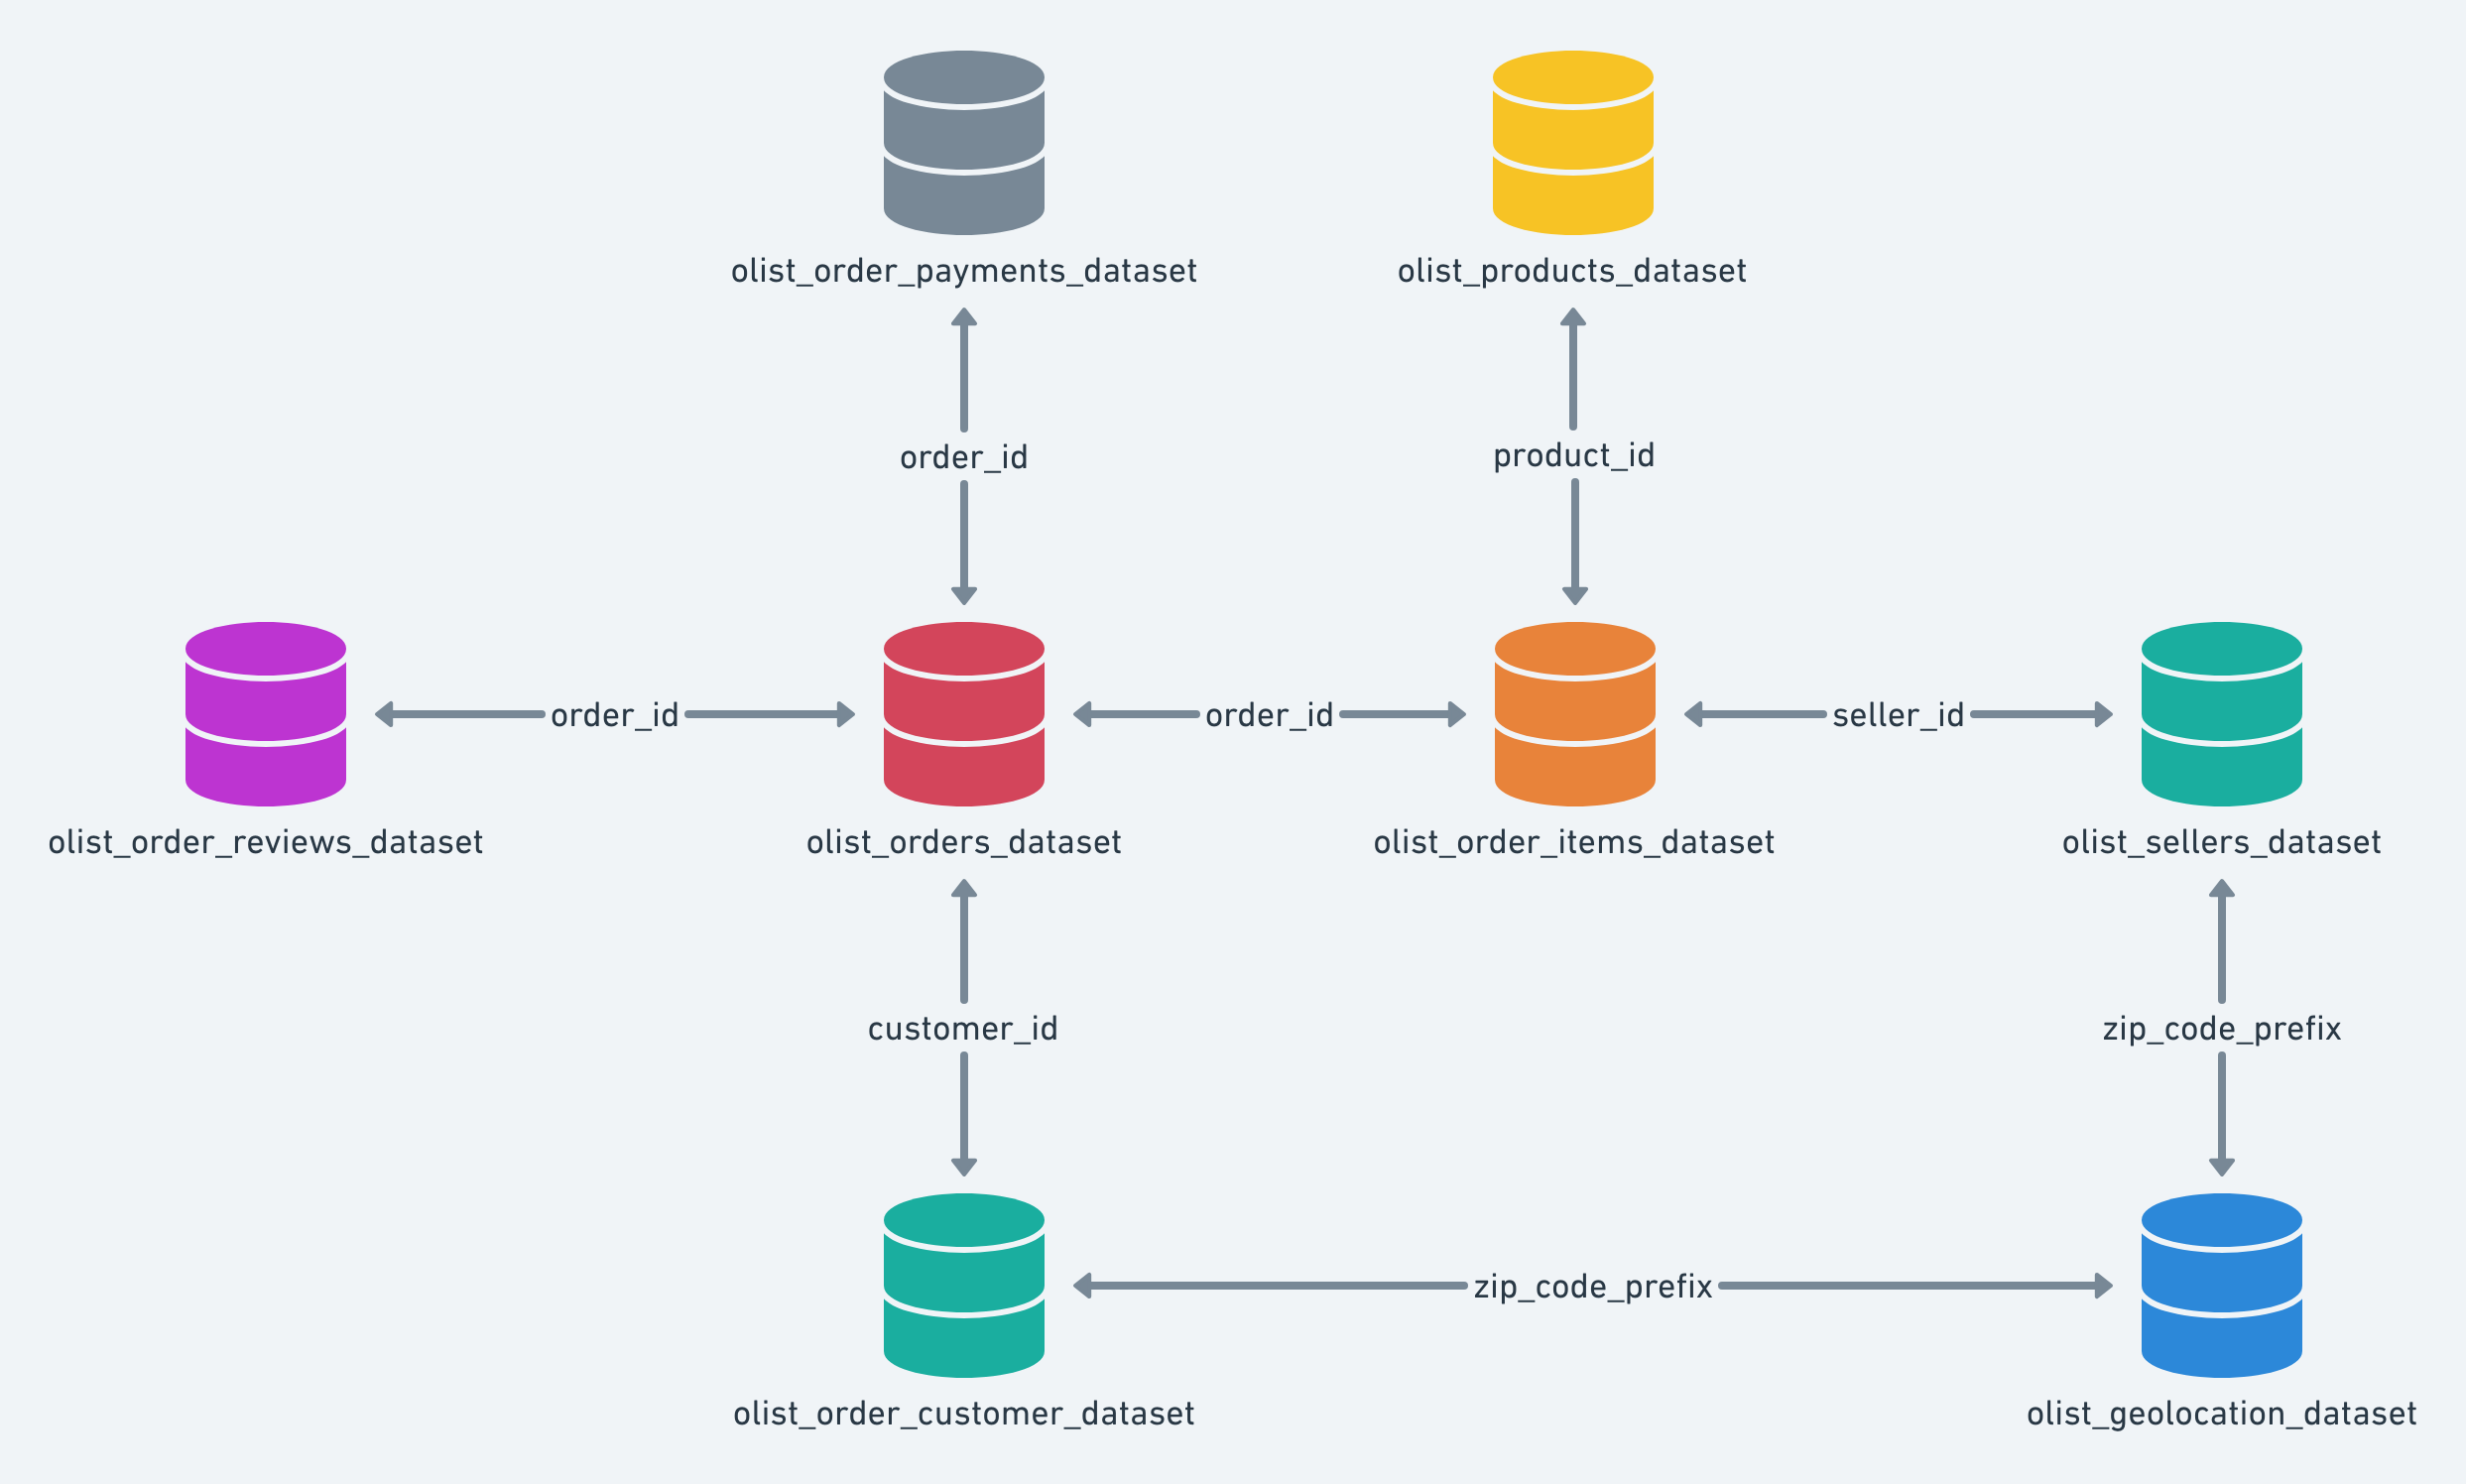

---

![Screenshot 2025-01-02 104544.png](<attachment:Screenshot 2025-01-02 104544.png>)

The CSVs will not load into pgAdmin 4 in any direct way. It is possible to import them into pgAdmin only by exporting the tables from python, if wanted whatsoever
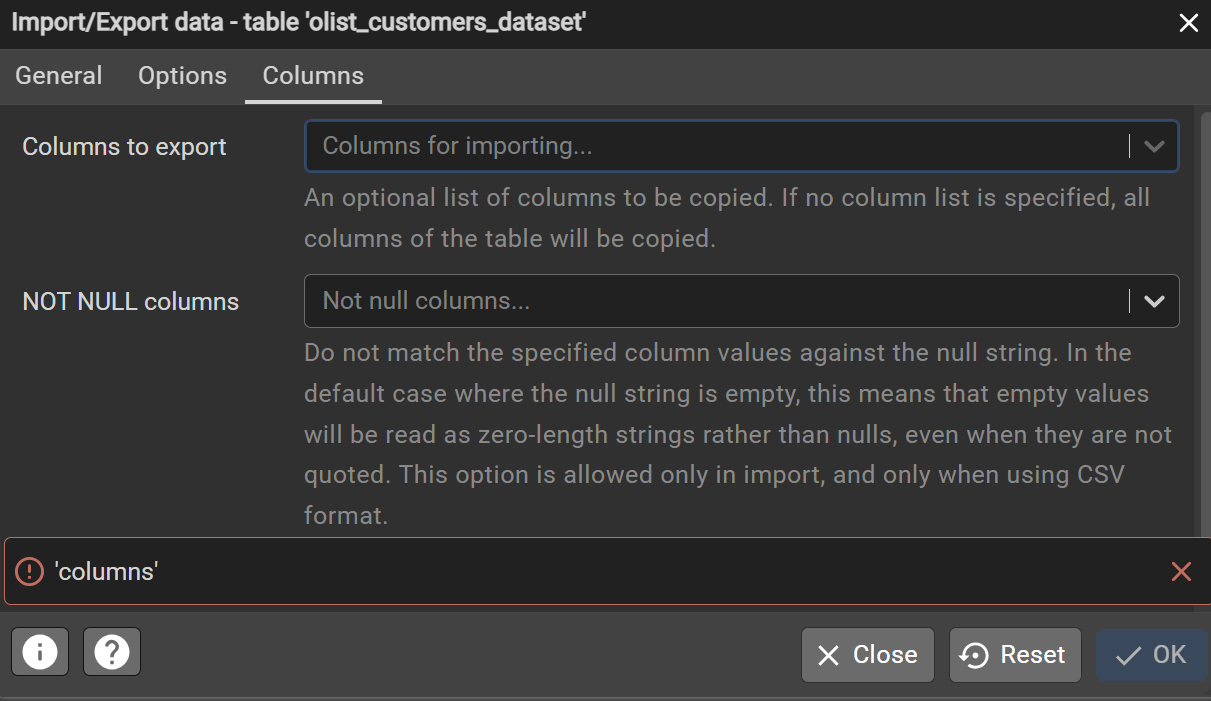

---

## 1. Load and Explore the Data : We will use two libraries in Python to load and explore our dataset: pandas and sqlalchemy.

- Pandas : pandas is a powerful library for data analysis in Python. It provides data structures and functions needed to manipulate structured data seamlessly.

- SQLAlchemy : SQLAlchemy is a library that provides tools to work with SQL databases using Python. It allows you to interact with databases in a more Pythonic way.


In [1]:
import pandas as pd
from sqlalchemy import create_engine
import zipfile

In [2]:
# extract zip into same folder
with zipfile.ZipFile('Brazilian E-Commerce Dive Deep using SQL.zip', 'r') as zip_ref:
    zip_ref.extractall()

# retrieve the CSVs as dataframes
df_olist_customers = pd.read_csv('olist_customers_dataset.csv')
df_olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_olist_orders = pd.read_csv('olist_orders_dataset.csv')
df_olist_products = pd.read_csv('olist_products_dataset.csv')
df_olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

# check
df_olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## 2. Create SQLite Database and Export DataFrames.

- Create a SQLite database using SQLAlchemy.


- Export each dataframe as a table to the SQLite database.


In [3]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
df_olist_customers.to_sql("olist_customers", con =engine)
df_olist_sellers.to_sql("olist_sellers", con =engine)
df_olist_order_reviews.to_sql("olist_order_reviews", con =engine)
df_olist_order_items.to_sql("olist_order_items", con =engine)
df_olist_products.to_sql("olist_products_dataset", con =engine)
df_olist_geolocation.to_sql("olist_geolocation", con =engine)
df_product_category_name_translation.to_sql("product_category_name_translation", con =engine)
df_olist_orders.to_sql("olist_orders", con =engine)
df_olist_order_payments.to_sql("olist_order_payments", con =engine)
df_olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
sql='''

Select * from olist_customers
limit 5


''';


df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head() # .head() is reduntant fi already use 'limit 5'... who wrote this exercise???!!!!!

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## 3. Query 1: Count and Percentage of Orders Purchased in Jan 2018 with 5 Review Score

Write and execute a SQL query to count the number of orders purchased in January 2018 that have a review score of 5 and calculate the percentage of such orders.


In [5]:
# define the date and score to get
year_month = '2018-01'
score = 5

# create the sql query using an f-string for better readability
query = f"""
SELECT COUNT(o.order_id) AS order_count,
       (COUNT(o.order_id) * 100.0 / (SELECT COUNT(*) FROM olist_orders
                                        WHERE strftime('%Y-%m', order_purchase_timestamp) = '{year_month}')) AS percentage
FROM olist_orders o
JOIN olist_order_reviews r ON o.order_id = r.order_id
WHERE strftime('%Y-%m', o.order_purchase_timestamp) = '{year_month}'
      AND r.review_score = {score};
"""

# execute the query and store the result in a DataFrame
result = pd.read_sql_query(query, con=engine)

# display the result
display(result)

,order_count,percentage
0,4097,56.362636


## 4. Query 2: Customer Purchase Trend Year-on-Year

Write and execute a SQL query to analyze the customer purchase trend year-on-year.


In [6]:
# create the SQL query
query = """
SELECT
    strftime('%Y', order_purchase_timestamp) AS purchase_year,
    COUNT(order_id) AS total_orders,
    COUNT(DISTINCT customer_id) AS unique_customers,

    -- multiply by 1.0 to convert the result to float
    -- NULLIF prevents division by zero errors by returning NULL if there are no unique customers
    (1.0 * COUNT(order_id) / NULLIF(COUNT(DISTINCT customer_id), 0)) AS avg_orders_per_customer

FROM
    olist_orders
GROUP BY
    strftime('%Y', order_purchase_timestamp)
ORDER BY
    purchase_year;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the first few rows of the result
display(result.head())

,purchase_year,total_orders,unique_customers,avg_orders_per_customer
0,2016,329,329,1.0
1,2017,45101,45101,1.0
2,2018,54011,54011,1.0


## 5. Query 3: Average Order Values of Customers

Write and execute a SQL query to calculate the average order values of customers.


In [7]:
# create the SQL query
query = """
SELECT
    o.customer_id,
    ROUND(
        1.0 * SUM(oi.price + oi.freight_value) / NULLIF(COUNT(DISTINCT o.order_id), 0),
        2
    ) AS avg_order_value
FROM
    olist_orders o
INNER JOIN
    olist_order_items oi ON o.order_id = oi.order_id
GROUP BY
    o.customer_id
ORDER BY
    avg_order_value DESC;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the first few rows of the result
display(result.head())

,customer_id,avg_order_value
0,1617b1357756262bfa56ab541c47bc16,13664.08
1,ec5b2ba62e574342386871631fafd3fc,7274.88
2,c6e2731c5b391845f6800c97401a43a9,6929.31
3,f48d464a0baaea338cb25f816991ab1f,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66


## 6. Query 4: Top 5 Cities with Highest Revenue from 2016 to 2018

Write and execute a SQL query to find the top 5 cities with the highest revenue from 2016 to 2018.


In [8]:
# create the SQL query
query = """
WITH city_revenue AS (
    SELECT
        c.customer_zip_code_prefix,
        g.geolocation_city,
        g.geolocation_state,
        SUM(oi.price + oi.freight_value) AS total_revenue
    FROM
        olist_orders o
    INNER JOIN
        olist_order_items oi ON o.order_id = oi.order_id
    INNER JOIN
        olist_customers c ON o.customer_id = c.customer_id
    INNER JOIN
        olist_geolocation g ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
    WHERE
        strftime('%Y', o.order_purchase_timestamp) BETWEEN '2016' AND '2018'
    GROUP BY
        g.geolocation_city, g.geolocation_state
)
SELECT
    geolocation_city AS city,
    geolocation_state AS state,
    total_revenue AS revenue
FROM
    city_revenue
ORDER BY
    total_revenue DESC
LIMIT 5;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the top 5 (LIMIT 5)
display(result)

,city,state,revenue
0,rio de janeiro,RJ,3.234987e+08
1,sao paulo,SP,1.646442e+08
2,belo horizonte,MG,1.127846e+08
3,niteroi,RJ,6.490756e+07
4,curitiba,PR,4.001365e+07


## 7. Query 5: State Wise Revenue Table Between 2016 to 2018

Write and execute a SQL query to create a state-wise revenue table between 2016 to 2018.


In [9]:
# create the SQL query
query = """
SELECT
    g.geolocation_state AS state,
    SUM(oi.price + oi.freight_value) AS total_revenue
FROM
    olist_orders o
INNER JOIN
    olist_order_items oi ON o.order_id = oi.order_id
INNER JOIN
    olist_customers c ON o.customer_id = c.customer_id
INNER JOIN
    olist_geolocation g ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
WHERE
    strftime('%Y', o.order_purchase_timestamp) BETWEEN '2016' AND '2018'
GROUP BY
    g.geolocation_state
ORDER BY
    total_revenue DESC;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the first few rows of the result
display(result.head())

,state,total_revenue
0,SP,8.104133e+08
1,RJ,5.121093e+08
2,MG,4.642485e+08
3,RS,1.310940e+08
4,PR,9.982463e+07


## 8. Query 6: Top Successful Sellers in Terms of Goods Sold, Revenue, and Customer Count

Write and execute a SQL query to identify the top successful sellers in terms of the number of goods sold, total revenue, customer count, and sellers with the highest 5-star ratings.


In [10]:
# create the SQL query
query = """
WITH seller_metrics AS ( -- CTE for the seller metrics
    SELECT
        oi.seller_id, -- seller ID
        COUNT(oi.order_item_id) AS goods_sold, -- number of goods sold
        SUM(oi.price + oi.freight_value) AS total_revenue, -- total revenue
        COUNT(DISTINCT o.customer_id) AS customer_count, -- count distinct customers
        AVG(CASE -- the way it is done, it returns a percentage
                WHEN r.review_score = 5 THEN 1
                ELSE 0
            END) AS five_star_percentage
    FROM
        olist_order_items oi
    INNER JOIN
        olist_orders o ON oi.order_id = o.order_id
    INNER JOIN
        olist_order_reviews r ON o.order_id = r.order_id
    GROUP BY
        oi.seller_id
)
SELECT -- main query
    s.seller_id,
    s.goods_sold,
    ROUND(s.total_revenue, 2) AS total_revenue,
    s.customer_count,
    ROUND(s.five_star_percentage * 100, 2) AS five_star_percentage
FROM
    seller_metrics s
ORDER BY
    s.total_revenue DESC,
    s.goods_sold DESC,
    s.customer_count  DESC,
    s.five_star_percentage DESC
LIMIT 10;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the top ten (LIMIT 10)
display(result)

,seller_id,goods_sold,total_revenue,customer_count,five_star_percentage
0,4869f7a5dfa277a7dca6462dcf3b52b2,1148,248102.61,1124,59.49
1,7c67e1448b00f6e969d365cea6b010ab,1367,239610.34,976,31.97
2,4a3ca9315b744ce9f8e9374361493884,1984,235581.68,1785,47.73
3,53243585a1d6dc2643021fd1853d8905,408,233703.75,356,51.47
4,fa1c13f2614d7b5c4749cbc52fecda94,582,202744.74,581,67.70
5,da8622b14eb17ae2831f4ac5b9dab84a,1568,187200.57,1308,56.95
6,7e93a43ef30c4f03f38b393420bc753a,339,182487.13,335,62.83
7,1025f0e2d44d7041d6cf58b6550e0bfa,1431,173453.79,907,50.94
8,7a67c85e85bb2ce8582c35f2203ad736,1166,161927.66,1151,61.49
9,955fee9216a65b617aa5c0531780ce60,1489,159194.52,1277,54.00


## 9. Query 7: Delivery Success Rate Across States

Write and execute a SQL query to calculate the delivery success rate across different states.


In [11]:
# create the SQL query
query = """
WITH state_delivery_data AS ( -- CTE for state-wise delivery data
    SELECT
        g.geolocation_state AS state,
        COUNT(o.order_id) AS total_orders, -- total orders
        SUM(CASE -- total delivered orders
                WHEN o.order_status = 'delivered' THEN 1
                ELSE 0
            END) AS delivered_orders
    FROM
        olist_orders o
    INNER JOIN
        olist_customers c ON o.customer_id = c.customer_id
    INNER JOIN
        olist_geolocation g ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
    GROUP BY
        g.geolocation_state
)
SELECT -- main query
    state,
    total_orders,
    delivered_orders,
    ROUND(
        (CAST(delivered_orders AS FLOAT) / total_orders) * 100,
        2
    ) AS delivery_success_rate
FROM
    state_delivery_data
ORDER BY
    delivery_success_rate DESC,
    total_orders DESC;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the first few rows of the result
display(result.head())

,state,total_orders,delivered_orders,delivery_success_rate
0,MS,61473,60457,98.35
1,ES,316654,311356,98.33
2,MT,122395,120089,98.12
3,RN,20595,20183,98.00
4,RS,805370,789215,97.99


## 10. Query 8: Preferred Form of Payment for Different Categories

Write and execute a SQL query to find the preferred form of payment for different product categories.


In [12]:
# create the SQL query using a multi-line string for better readability
query = """
SELECT
    p.product_category_name AS category,
    op.payment_type AS preferred_payment_method,
    COUNT(op.payment_sequential) AS payment_count
FROM
    olist_order_items oi
INNER JOIN
    olist_orders o ON oi.order_id = o.order_id
INNER JOIN
    olist_order_payments op ON o.order_id = op.order_id
INNER JOIN
    olist_products_dataset p ON oi.product_id = p.product_id
GROUP BY
    p.product_category_name,
    op.payment_type
ORDER BY
    payment_count DESC;
"""

# execute the query and store the result in a dataframe
result = pd.read_sql_query(query, con=engine)

# display the first few rows of the result
display(result.head())

,category,preferred_payment_method,payment_count
0,cama_mesa_banho,credit_card,8959
1,beleza_saude,credit_card,7566
2,esporte_lazer,credit_card,6635
3,moveis_decoracao,credit_card,6379
4,informatica_acessorios,credit_card,5436


## 11. Query 9: Distance Between Cities

Write and execute a SQL query to calculate the distance between cities.


The geolocation dataset is full of repeated cities, we can reduce that number by averaging their coordinates:

In [13]:
query = """
SELECT 
    geolocation_city, 
    AVG(geolocation_lat) AS avg_lat, 
    AVG(geolocation_lng) AS avg_lng
FROM 
    olist_geolocation
GROUP BY 
    geolocation_city
"""
df_avg_geolocation = pd.read_sql_query(query, con=engine)

display(df_avg_geolocation)

,geolocation_city,avg_lat,avg_lng
0,* cidade,-25.571748,-49.334374
1,...arraial do cabo,-22.969370,-42.029834
2,4o. centenario,-24.271860,-53.069433
3,4º centenario,-24.279801,-53.074723
4,abadia de goias,-16.767063,-49.438089
...,...,...,...
8006,áurea,-27.695009,-52.055076
8007,ângulo,-23.195024,-51.917294
8008,érico cardoso,-13.393047,-42.134282
8009,óbidos,-1.907183,-55.516370


In [14]:
df_avg_geolocation['geolocation_city'].nunique()

8011

Still, there are many repeated values such as '4o. centenario' and '4º centenario'. And i don't have anymore the strenght to clean that. Also i don't think the one who uploaded this exercise did calculate it

Anyway, for anyone interested and with enough CPU power and free time is free to run this code below and tell me if it worked or not:

In [16]:
# from geopy.distance import geodesic

# # create a dictionary to store the coordinates (lat, lng) of each city
# city_coordinates = dict(zip(df_avg_geolocation['geolocation_city'], 
#                             zip(df_avg_geolocation['avg_lat'], df_avg_geolocation['avg_lng'])))

# # calculate the distances
# distances = []
# for i, (city_1, coord_1) in enumerate(city_coordinates.items()):
#     for city_2, coord_2 in list(city_coordinates.items())[i + 1:]:
#         distance_km = geodesic(coord_1, coord_2).kilometers
#         distances.append((city_1, city_2, distance_km))

# # convert distances list to dataframe
# df_distances = pd.DataFrame(distances, columns=['city_1', 'city_2', 'distance_km'])

# # display the result
# display(df_distances.head())

Uncomment upside if you want to calculate it, but it would be around 32M rows, im pretty shure the one who uploaded the exercise just improvised the question as so much many times :-)